## **Notebook 3: Signal-to-Noise Ratio**
*Learning outcomes*
- We will learn about the signal-to-noise ratio (SNR) in an astronomical image.
- We will learn about the different components that lead to the calculation of the SNR.
- We will study the impact of changing the exposure time of your observation on the SNR.
- We will study the how the SNR changes when observing an astronomical source using:
    - One long exposure.
    - Multiple shorter exposures.
- We will then introduce a model of a star into the image.
- We will interactively study the impact of varying noise parameters on the SNR of the star. 

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})
import useful_functions as conv_funcs

- The signal-to-noise ratio (SNR) is a quantitity used to estimate the quality with which an astronomical source is detected by an instrument. 
- For a point astronomical source (such as a star), the SNR is given by

\begin{equation}
\text{SNR} = \frac{S_{s} t \, n_{\rm exp}}{{(S_{s}t\, n_{\rm exp} + S_{b} \,t \, n_{\rm exp} n_{\rm pix} + S_{d}\,t \, n_{\rm exp} n_{\rm pix}  + R^{2} \, n_{\rm exp} n_{\rm pix} )}^{1/2}}
\tag{1}
\end{equation}

- $S_{s}$: the number of electrons per second per pixel from the astronomical source [electrons/sec]
- $S_{b}$: the number of electrons per second per pixel from the sky background [electrons/sec/pixel]
- $S_{d}$: the number of electrons per second per pixel due to dark (thermally excited) current [electrons/sec/pixel]
- $R$ is the read noise (Gaussian distributed) due to the inherent process of reading the charge on a capacitor to convert to voltage, which then gets digitized to an analog-to-digital-unit (ADU) [electrons/pixel]
- $n_{\rm exp}$ is the number of exposures
- $n_{\rm pix}$ is the number of pixels of the aperture under consideration for the SNR calculation
- $t$ is the exposure time per exposure

### **Exercise 1: Signal-to-Noise-Ratio Calculator**
- Write a function called `get_SNR` that calculates the SNR using the above equation.
- The inputs of the function should be:
    - `source_count_rate`: (float) the number of electrons per second per pixel from the source [electrons/sec]
    - `sky_noise_electrons`: (float) the number of electrons per second per pixel from the sky background [electrons/sec/pixel]
    - `dark_current`: (float) the number of electrons per second per pixel due to dark (thermally excited) current [electrons/sec/pixel]
    - `read_noise_std`: (float) [electrons/pixel]
    - `exposure_time`: (float) the exposure time for each exposure [seconds]
    - `n_exp`: (int) total number of exposure []
    - `n_pix`: (int) number of pixels []
- The function should return the (float) SNR.

In [2]:
# Solution to Exercise 1
def get_SNR(source_count_rate,
            read_noise_std,
            sky_noise_electrons,
            dark_current,
            exposure_time,
            n_exp=1,
            n_pix=1):    
    """
    Simple CCD equation. Given source count rate, exposure time, 
    read and sky noise, calculates the SNR.
    inputs:
    1) source_count_rate: (float) [electrons/second]
    2) read_noise_std: (float) [electrons/pixel]
    3) sky_noise_electrons: (float) [electrons/second/pixel]
    4) dark_current: (float) [electrons/second/pixel]
    5) exposure_time: (float) exposure time of sensor [seconds]
    7) n_exp: (int) number of exposures 
    returns:
    1) signal-to-noise ratio: (float)
    """
    signal = source_count_rate * exposure_time * n_exp
    
    # invidivual noise terms
    noise_source = source_count_rate * exposure_time * n_exp
    noise_sky = sky_noise_electrons * exposure_time * n_exp * n_pix
    noise_dark = dark_current * exposure_time * n_exp * n_pix
    noise_read = n_exp * read_noise_std**2 * n_pix
    
    noise = np.sqrt(noise_source 
                  + noise_sky
                  + noise_dark
                  + noise_read)
    return signal / noise

### **Exercise 2: SNR as a function of exposure time (single long exposure)**
- Using the `get_SNR` from Exercise 1, plot the SNR as a function of exposure time for a single long exposure by the camera.
- Choose a source count rate of 1 [electrons/s/pixel]
- Choose a background count rate of 0.5 [electrons/s/pixel]
- Choose a dark current of 0.1 [electrons/s/pixel]
- Choose a read noise of 10 [electrons/pixel]
- Choose a single long exposure (ie `n_exp` = 1) rather than multiple short exposures.
- Choose one pixel (`n_pix` = 1).
- Vary the `exposure_time` from 0 to 500 seconds in increments of 5 seconds.
    - Hint, you may find the `numpy.arange` and `numpy.append` functions useful for this exercise.
- Plot SNR (y-axis) and exposure time (x-axis).
- Does the SNR increase or decrease with exposure time? Is the increase or decrease linear? Why or why not?

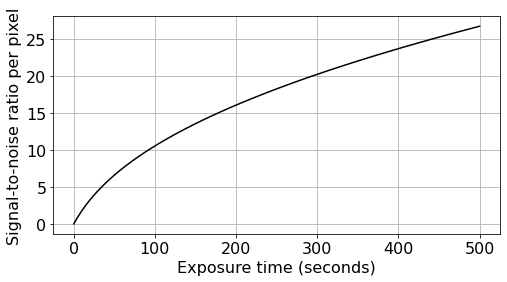

In [3]:
# Solution to Exercise 2
exp_times = np.arange(0, 505, 5)
snr_list = []

# Setup the parameters
source_count_rate = 2 # electrons/sec/pixel
read_noise_std = 10 # electrons/pixel
sky_noise_electrons = 0.5 # electrons/sec/pixel
dark_current = 0.1 # electrons/sec/pixel
n_exp = 1 # number of exposures
n_pix = 1 # number of pixels in the aperture for SNR calculation

for exposure_time in exp_times:
    snr_list.append(get_SNR(source_count_rate=source_count_rate,
                        read_noise_std=read_noise_std,
                        sky_noise_electrons=sky_noise_electrons,
                        dark_current=dark_current,
                        exposure_time=exposure_time,
                        n_exp=n_exp,
                        n_pix=n_pix))

plt.figure(figsize=(8, 4))
plt.plot(exp_times, snr_list, color='black')
plt.xlabel("Exposure time (seconds)")
plt.ylabel("Signal-to-noise ratio per pixel")
plt.grid()
plt.show()

# The SNR increases with exposure time. This is because as the 
# exposure time increases, the camera is detecting increasingly more
# photons from the astrnomical point source. The increase in SNR
# with exposure time is non-linear due to the square root in the
# the noise term. 

### **Exercise 3: SNR as a function of exposure time (multiple short exposures)**
- Plot the SNR as a function of number of exposures to achieve a total exposure time of 500 seconds.
- Plot the SNR as a function of individual exposure time for each exposure to achieve a total exposure time of 500 seconds.
- How does the SNR change between the following two cases?
    - One long exposure of 500 seoconds
    - 500 short exposures of 1 second each
- Why does the SNR decrease when the number of exposures is increased? Hint: what term in the SNR equation does not depend on exposure time?
- What would a telescope want to do multiple short exposures instead of a single long exposure?

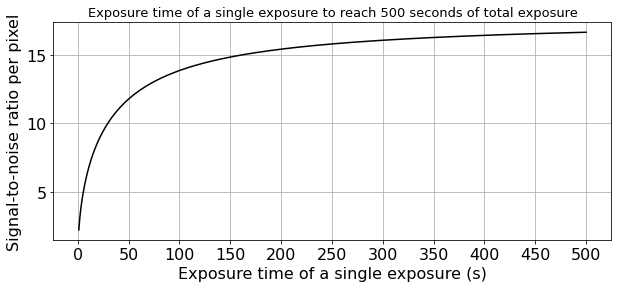

In [4]:
# Solution to Exercise 3
exposure_total = 500 # seconds
short_exposures = np.arange(1, 501, 1)
n_exposures = exposure_total / short_exposures

# Setup parameters
source_count_rate = 1 # electrons/sec/pixel
read_noise_std = 10 # electrons/pixel
sky_noise_electrons = 0.5 # electrons/sec/pixel
dark_current = 0.1 # electrons/sec/pixel
n_pix = 1

# Create empty list to append SNR to
snr_list = []

for n_exp in n_exposures:
    exposure_time = exposure_total / n_exp
    snr_list.append(get_SNR(source_count_rate=source_count_rate,
                            read_noise_std=read_noise_std,
                            sky_noise_electrons=sky_noise_electrons,
                            dark_current=dark_current,
                            exposure_time=exposure_time,
                            n_exp=n_exp,
                            n_pix=n_pix))

plt.figure(figsize=(10, 4))
plt.plot(short_exposures, snr_list, color='black')
plt.title("Exposure time of a single exposure to reach 500 seconds of total exposure",
         fontsize=13)
plt.xticks(np.arange(0, 550, 50))
plt.xlabel("Exposure time of a single exposure (s)")
plt.ylabel("Signal-to-noise ratio per pixel")
plt.grid()
plt.show()

# The SNR decreases when multiple short exposures are used instead of 
# of a single long exposure because the read noise increases for the
# multiple short exposures each time an individual short exposure is 
# read out.

# A telescope might choose to do multiple short exposures rather than
# a single long exposure because of pointing stability of the 
# telescope. If the pointing motors of the telescope cannot be 
# sufficiency stable for a total period of 500 seconds, but instead 
# can only be stable for up to 100 seconds, the telescope is better off
# doing 5 x 100 second exposures rather than a long 500 second 
# exposure. A single long exposure can also be deteriorated by 
# satellite streaks, whereas if multiple short exposures are taken,
# the exposures with satellite streaks can be discarded. Multiple
# shorter exposures, however, have the disadvantage of a lower SNR
# and therefore slower observation speed compared to a single long 
# expousre, as seen in the Figure below.

### **Exercise 4: Interactive SNR versus exposure time**
- Below, we write a function to interactively plot the SNR as a function of exposure time for a single long exposure.
- In a new cell, type `snr_interactive`
- Change the source count rate, read noise, sky noise, and dark current to see the effect of varying these parameters on the SNR.
- Which parameter has the most signficiant impact on the SNR?

In [5]:
# Exercise 4 setup
from ipywidgets import interactive

def int_get_SNR(source_count_rate=1,
                read_noise=10,
                sky_noise=0.5,
                dark_current=0.1,
                n_pix=1):
    """
    Simple CCD equation. Given source count rate, exposure time, 
    read and sky noise, calculates the SNR.
    inputs:
    1) source_count_rate: (float) [electrons/second]
    2) read_noise: (float) [electrons/pixel]
    3) sky_noise: (float) [electrons/second/pixel]
    4) dark_current: (float) [electrons/second/pixel]
    returns:
    1) signal-to-noise ratio: (float)
    """
    exposure_time = np.arange(1, 501, 1)
    n_exp = 1 # set num of exposures to 1
    snr_list = []
    
    for exp_time in exposure_time:
        signal = source_count_rate * exp_time * n_exp

        # invidivual noise terms
        noise_source = source_count_rate * exp_time * n_exp
        noise_sky = sky_noise * exp_time * n_exp * n_pix
        noise_dark = dark_current * exp_time * n_exp * n_pix
        noise_read = n_exp * read_noise**2 * n_pix

        noise = np.sqrt(noise_source 
                      + noise_sky
                      + noise_dark
                      + noise_read)
    
        snr_list.append(signal/noise)
    
    plt.figure(figsize=(8, 4))
    plt.plot(exposure_time, snr_list, color='black')
    plt.xlabel("Exposure time [seconds]")
    plt.ylabel("Signal-to-noise ratio per pixel")
    plt.grid()
    plt.show()    

snr_interactive = interactive(int_get_SNR,
                              source_count_rate=(0.1, 5, 0.1),
                              read_noise=(1, 20, 1),
                              sky_noise=(0.1, 5, 0.1),
                              dark_current=(0.1, 5, 0.1),
                              n_pix=(1, 10, 1)) 

for sim in snr_interactive.children:
    try:
        sim.continuous_update = True
    except KeyError:
        pass

In [6]:
# Solution to Exercise 4
snr_interactive

# The source count rate has the most significant impact on the SNR
# as the source rate is part of the signal itself. 

interactive(children=(FloatSlider(value=1.0, description='source_count_rate', max=5.0, min=0.1), IntSlider(val…

### **Exercise 5: Explore the signal-to-noise ratio of a star**
1) Below, we first write a function to inject a star into our noise image. We will use a two-dimentional Gaussian model for the star. 
2) Next, we will create an interactive function to plot the noise and star image.
3) Vary the different parameters in the simulation (such as the exposure time, dark current, sky noise, and source count rate, etc) and study their affect on (i) the SNR of the star (which is printed in the title of the plots) and how visible/non-visible the star becomes as a function of the different noise parameters. You can also play with the plot scale for variation in visualization of the image.

In [7]:
def inject_star(image, 
                source_count_rate,
                gain,
                exposure_time,
                gaussian_sigma, 
                add_shot_noise=False):
    """
    Generates of 2D array with a star model
    inputs:
    1) image: numpy array
         Science image whose shape read noise array will match  
    2) source_count_rate: (float) [electrons/second/pixel]
         Number of electrons/s/pixel from the astronomical source
    3) exposure_time: (float) [seconds]
         Exposure time of the image [seconds]
    4) gaussian_sigma: (float) [pixels]
         Sigma of Gaussian model of the star [pixels]
    5) add_shot_noise: (bool)
         Whether or not to add source shot noise sampled from a 
         Poisson distribution
    returns:
    1) image: (numpy array)
        Numpy array with the star model
    """
    size = image.shape[0]
    
    # place the star at the center of the image
    x0 = size / 2
    y0 = size / 2
    
    source_count_rate_adu = source_count_rate / gain
    amplitude = source_count_rate_adu * exposure_time
    
    for i in range(size):
        for j in range(size):
            val = amplitude*math.exp(-4*math.log(2) * ((i-x0)**2 + (j-y0)**2) / gaussian_sigma**2)
            
            if add_shot_noise:    
                image[i,j] = np.random.poisson(lam=val)
            else:
                image[i,j] = val
    return image

In [8]:
def full_image_interactive(bias_value=200,
                           num_bad_columns=5,
                           read_noise_std=10,
                           dark_current=0.1,
                           hot_pixels=False,
                           hot_pixels_percentage=0.01,
                           percent_variations=5,
                           sky_noise_electrons=0.5,
                           exposure_time=100,
                           gaussian_sigma=10,
                           source_count_rate=1,
                           plot_scale='linear',
                           add_shot_noise=True):
    """
    Uses previously constructed functions to make an interactive
    noise and star image simulation.
    """
    # gain
    gain = 0.76 # electron/ADU
    
    # Construct a blank image
    blank_image = np.zeros([1000, 1000])
    
    # Construct a bias only image
    im_bias = conv_funcs.get_bias_level(image=blank_image,
                                        bias_value=bias_value,
                                        num_columns=num_bad_columns)
    
    # Construct a read noise only image
    im_read_noise = conv_funcs.get_read_noise(image=blank_image,
                                              read_noise_std=read_noise_std,
                                              gain=gain)
    
    # Construct a dark current only image
    im_dark_current = conv_funcs.get_dark_current(image=blank_image,
                                                  dark_current=dark_current,
                                                  gain=gain,
                                                  exposure_time=exposure_time,
                                                  hot_pixels=hot_pixels,
                                                  hot_pixels_percentage=hot_pixels_percentage)

    # Construct a sky noise only image
    im_sky_noise = conv_funcs.get_sky_bkg(image=blank_image,
                                          sky_noise_electrons=sky_noise_electrons,
                                          gain=gain,
                                          exposure_time=exposure_time)
    
    # Construct a flat field image
    im_flat = conv_funcs.get_flat(image=blank_image,
                                  percent_variations=percent_variations)

    # Flat field correct the sky noise image
    im_sky_noise_corr = np.multiply(im_sky_noise, im_flat)
    
    # Total noise image
    noise = im_read_noise+im_dark_current+im_sky_noise_corr+im_bias
    
    # Star
    star = inject_star(image=blank_image,
                       source_count_rate=source_count_rate,
                       gain=gain,
                       exposure_time=exposure_time,
                       gaussian_sigma=gaussian_sigma,
                       add_shot_noise=add_shot_noise)
    
    # Flat field correct the star image
    im_star_corr = np.multiply(star, im_flat)    
    
    # Total noise plus source image
    final_image = noise + im_star_corr
    
    # Get SNR per pixel of the source
    snr = get_SNR(source_count_rate=source_count_rate,
                 read_noise_std=read_noise_std,
                 dark_current=dark_current,
                 sky_noise_electrons=sky_noise_electrons,
                 exposure_time=exposure_time,
                 n_pix=1,
                 n_exp=1)
    
    # plots
    if plot_scale == 'zscale':
        interval_type = 'zscale'
        stretch = 'linear'
    elif plot_scale == 'linear':
        interval_type = 'simple_norm'
        stretch = plot_scale
    elif plot_scale == 'log':
        interval_type = 'simple_norm'
        stretch = plot_scale 
    elif plot_scale == 'sqrt':
        interval_type = 'simple_norm'
        stretch = plot_scale
        
    conv_funcs.plot_image(image=final_image, 
               title="Simulated image (zoomed in). SNR of brightest pixel of the star is: {:.2f}".format(snr),
               interval_type=interval_type,
               stretch=stretch,
               xlim_minus=400,
               xlim_plus=600,
               ylim_minus=400,
               ylim_plus=600,
               cmap='viridis')
    
    conv_funcs.plot_image(image=final_image, 
               title="Simulated image. SNR of brightest pixel of the star is: {:.2f}".format(snr),
               interval_type=interval_type,
               stretch=stretch,
               cmap='viridis')
    return None

total_image_interactive = interactive(full_image_interactive, 
                   exposure_time=(0, 300, 10),
                   read_noise_std=(0, 50, 5),
                   dark_current=(0.0, 10, 0.1),
                   hot_pixels=False,
                   hot_pixels_percentage=(0, 1, 0.01),
                   bias_value=(10,500,10), 
                   num_bad_columns=(0, 6, 1),
                   sky_noise_electrons=(0.0, 10, 0.1),
                   source_count_rate=(0, 5, 0.1),
                   gaussian_sigma=(1, 50, 1),
                   intensity=(0, 50, 0.5),
                   add_shot_noise=True,
                   plot_scale=['linear', 
                               'log',
                               'zscale',
                               'sqrt'])

for kid in total_image_interactive.children:
    try:
        kid.continuous_update = True
    except KeyError:
        pass
    
total_image_interactive

interactive(children=(IntSlider(value=200, description='bias_value', max=500, min=10, step=10), IntSlider(valu…